# Tsunami effect prediction

We all know that TSUNAMI is biggest natural disaster which took the lives of many human in different countries. Science had found out different reasons or cause behind eeach Tsunamis and still its not yet confirmed. The effect of Tsunami gets vary with the underlying cause.

This dataset is about the effect of Tsunami in different countries ,its causes and the maginitude of the causes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, math

# 1.Reading the Tsunami dataset

In [2]:
data=pd.read_csv('Tsunami_dataset.csv')

# Dataset descirption

In [3]:
data.shape

(2108, 15)

In [4]:
data.head()

,YEAR,MONTH,DAY,HOUR,MINUTE,LATITUDE,LONGITUDE,LOCATION_NAME,COUNTRY,REGION,CAUSE,EVENT_VALIDITY,EQ_MAGNITUDE,EQ_DEPTH,TS_INTENSITY
0,-330,NaN,NaN,NaN,NaN,40.00,25.00,"E. SPORADES ISLANDS, AEGEAN ISLANDS",GREECE,Mediterranean Sea,Earthquake,Very Doubtful Tsunami,7.0,NaN,NaN
1,859,NaN,NaN,NaN,NaN,36.08,36.25,SAMANDAGI,TURKEY,Mediterranean Sea,Earthquake,Questionable Tsunami,NaN,NaN,3.0
2,1580,1.0,NaN,NaN,NaN,40.00,128.00,YELLOW SEA,NORTH KOREA,"China, North and South Korea, Philippines, Taiwan",Unknown,Very Doubtful Tsunami,NaN,NaN,1.0
3,-1300,NaN,NaN,NaN,NaN,39.96,26.24,"IONIAN COASTS, TROAD",TURKEY,Mediterranean Sea,Unknown,Questionable Tsunami,6.0,NaN,5.0
4,1556,10.0,21.0,NaN,NaN,37.00,126.00,YELLOW SEA,SOUTH KOREA,"China, North and South Korea, Philippines, Taiwan",Unknown,Very Doubtful Tsunami,NaN,NaN,0.5


In [5]:
data.columns

Index(['YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTE', 'LATITUDE', 'LONGITUDE',
       'LOCATION_NAME', 'COUNTRY', 'REGION', 'CAUSE', 'EVENT_VALIDITY',
       'EQ_MAGNITUDE', 'EQ_DEPTH', 'TS_INTENSITY'],
      dtype='object')

Feature understanding
1.YEAR -- year in which Tsunami occured

2.MONTH --month in which Tsunami occured

3.DAY--day on which Tsunami occured

4.HOUR--hour at which Tsunami occured

5.MINUTE--minute at which Tsunami occured

6.LATITUDE--latitude details

7.LONGITUDE--longitude details

8.LOCATION_NAME--affected location

9.COUNTRY--affected country

10.REGION--affected region

11.CAUSE--reason behind the Tsunami

12.EVENT_VALIDITY--effect of event

13.EQ_MAGNITUDE--earth quake magnitude

14.EQ_DEPTH -- earth quake depth

15.TS_INTENSITY--intensity of Tsunami

In [6]:
data.describe()

,YEAR,MONTH,DAY,HOUR,MINUTE,LATITUDE,LONGITUDE,EQ_MAGNITUDE,EQ_DEPTH,TS_INTENSITY
count,2108.000000,2050.000000,2005.00000,1246.000000,1191.000000,2108.000000,2108.000000,1637.000000,919.000000,1323.000000
mean,1775.981499,6.624878,15.22793,11.296950,28.456759,18.132364,50.366912,7.136225,36.388248,1.554316
std,418.590068,3.453557,8.82240,6.990649,17.125722,27.504812,101.276748,1.015486,40.891884,1.820983
min,-2000.000000,1.000000,1.00000,0.000000,0.000000,-63.000000,-179.971000,3.200000,0.000000,-4.140000
25%,1769.000000,4.000000,8.00000,5.000000,14.000000,-4.250000,-63.117500,6.600000,17.000000,0.500000
50%,1905.000000,7.000000,15.00000,11.000000,29.000000,30.700000,99.245000,7.100000,31.000000,1.500000
75%,1967.000000,10.000000,22.00000,18.000000,43.000000,38.571000,138.300000,7.600000,40.000000,3.000000
max,2020.000000,12.000000,31.00000,23.000000,59.000000,142.467000,179.984000,19.700000,600.000000,9.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2108 entries, 0 to 2107
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   YEAR            2108 non-null   int64  
 1   MONTH           2050 non-null   float64
 2   DAY             2005 non-null   float64
 3   HOUR            1246 non-null   float64
 4   MINUTE          1191 non-null   float64
 5   LATITUDE        2108 non-null   float64
 6   LONGITUDE       2108 non-null   float64
 7   LOCATION_NAME   2104 non-null   object 
 8   COUNTRY         2108 non-null   object 
 9   REGION          2107 non-null   object 
 10  CAUSE           2108 non-null   object 
 11  EVENT_VALIDITY  2108 non-null   object 
 12  EQ_MAGNITUDE    1637 non-null   float64
 13  EQ_DEPTH        919 non-null    float64
 14  TS_INTENSITY    1323 non-null   float64
dtypes: float64(9), int64(1), object(5)
memory usage: 247.2+ KB


# Checking for null values and handling null values.

In [8]:
data.isna().sum()

YEAR                 0
MONTH               58
DAY                103
HOUR               862
MINUTE             917
LATITUDE             0
LONGITUDE            0
LOCATION_NAME        4
COUNTRY              0
REGION               1
CAUSE                0
EVENT_VALIDITY       0
EQ_MAGNITUDE       471
EQ_DEPTH          1189
TS_INTENSITY       785
dtype: int64

There are many features with null values,some not contributing to the model creation,hence dropping them.

In [9]:
#Dropping some of the columns with null values
new_data=data.drop(['HOUR', 'MINUTE' ],axis=1)

In [10]:
new_data.columns

Index(['YEAR', 'MONTH', 'DAY', 'LATITUDE', 'LONGITUDE', 'LOCATION_NAME',
       'COUNTRY', 'REGION', 'CAUSE', 'EVENT_VALIDITY', 'EQ_MAGNITUDE',
       'EQ_DEPTH', 'TS_INTENSITY'],
      dtype='object')

In [11]:
new_data.duplicated().sum()

0

In [12]:
new_data.shape

(2108, 13)

In [13]:
new_data.isna().sum()

YEAR                 0
MONTH               58
DAY                103
LATITUDE             0
LONGITUDE            0
LOCATION_NAME        4
COUNTRY              0
REGION               1
CAUSE                0
EVENT_VALIDITY       0
EQ_MAGNITUDE       471
EQ_DEPTH          1189
TS_INTENSITY       785
dtype: int64

In [14]:
#Replacing the null values in MONTH,DAY,REGION,CAUSE with the mode.
for column in ['MONTH', 'DAY', 'REGION', 'CAUSE']:
    new_data[column].fillna(new_data[column].mode()[0], inplace=True)
    
#Replacing the null values in LOCATION_NAME with the ffill.
new_data['LOCATION_NAME'].fillna(method='ffill',inplace=True)

#filling the eq_magnitude and ts_intensity fields with median
for i in ['EQ_MAGNITUDE','TS_INTENSITY']:
    new_data[i]=new_data[i].fillna(new_data[i].median())

#filling the missing values of remaining EQ_DEPTH fields with 0s
new_data['EQ_DEPTH']=new_data['EQ_DEPTH'].fillna(0)



In [15]:
new_data.isna().sum()

YEAR              0
MONTH             0
DAY               0
LATITUDE          0
LONGITUDE         0
LOCATION_NAME     0
COUNTRY           0
REGION            0
CAUSE             0
EVENT_VALIDITY    0
EQ_MAGNITUDE      0
EQ_DEPTH          0
TS_INTENSITY      0
dtype: int64

In [16]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2108 entries, 0 to 2107
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   YEAR            2108 non-null   int64  
 1   MONTH           2108 non-null   float64
 2   DAY             2108 non-null   float64
 3   LATITUDE        2108 non-null   float64
 4   LONGITUDE       2108 non-null   float64
 5   LOCATION_NAME   2108 non-null   object 
 6   COUNTRY         2108 non-null   object 
 7   REGION          2108 non-null   object 
 8   CAUSE           2108 non-null   object 
 9   EVENT_VALIDITY  2108 non-null   object 
 10  EQ_MAGNITUDE    2108 non-null   float64
 11  EQ_DEPTH        2108 non-null   float64
 12  TS_INTENSITY    2108 non-null   float64
dtypes: float64(7), int64(1), object(5)
memory usage: 214.2+ KB


# Exploratory Data Analysis

# Univariate Analysis

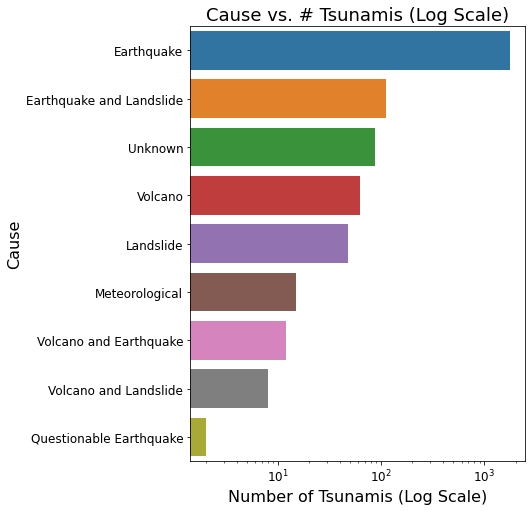

In [17]:
plt.figure(figsize=(6,8))
ax = sns.countplot(y="CAUSE", data=new_data, order=new_data["CAUSE"].value_counts().index)
ax.set_xscale("log")
ax.axes.set_title("Cause vs. # Tsunamis (Log Scale)",fontsize=18)
ax.set_xlabel("Number of Tsunamis (Log Scale)",fontsize=16)
ax.set_ylabel("Cause",fontsize=16)
ax.tick_params(labelsize=12)
plt.show()

The main reason behind Tsunamis is Earthquake and then landslides.

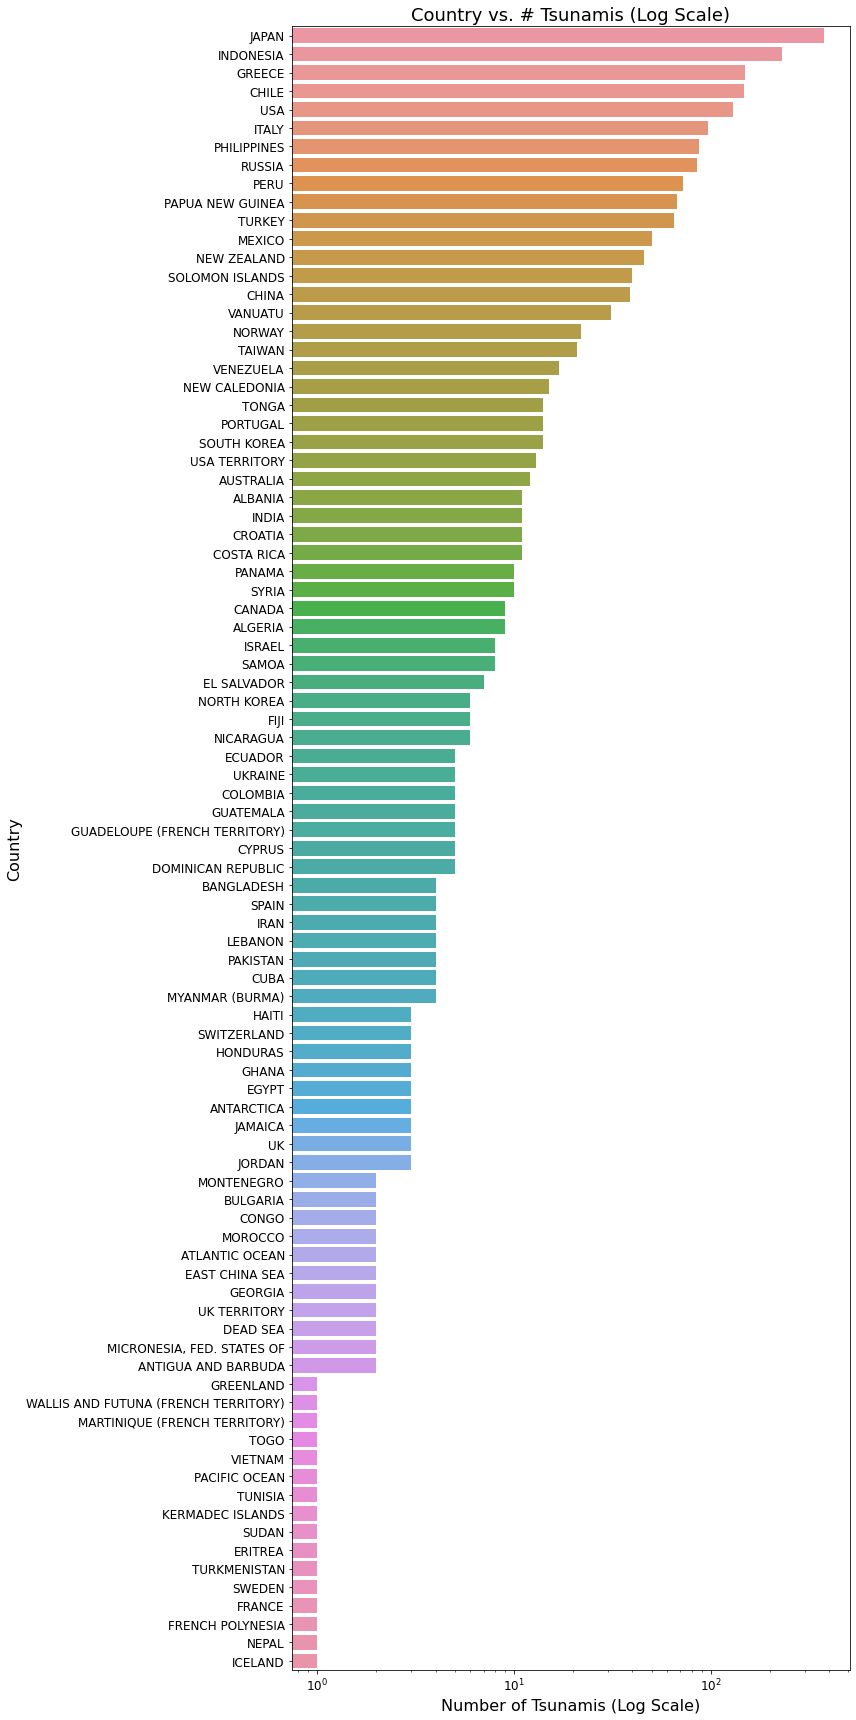

In [18]:
plt.figure(figsize=(12,24))
ax = sns.countplot(y="COUNTRY", data=new_data, order=new_data["COUNTRY"].value_counts().index)
ax.set_xscale("log")
ax.axes.set_title("Country vs. # Tsunamis (Log Scale)",fontsize=18)
ax.set_xlabel("Number of Tsunamis (Log Scale)",fontsize=16)
ax.set_ylabel("Country",fontsize=16)
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.show()

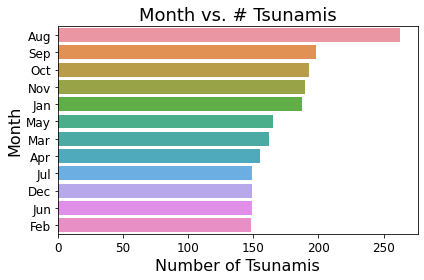

In [19]:
plt.figure(figsize=(6,4))
month_idxs = np.array(list(map(lambda x: int(x), new_data["MONTH"].value_counts().keys().tolist())))-1
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
months = list(map(month_names.__getitem__, month_idxs))
ax = sns.countplot(y="MONTH", data=new_data, order=new_data["MONTH"].value_counts().index)
ax.axes.set_title("Month vs. # Tsunamis",fontsize=18)
ax.set_xlabel("Number of Tsunamis",fontsize=16)
ax.set_ylabel("Month",fontsize=16)
ax.tick_params(labelsize=12)
ax.set_yticklabels(months, rotation=0, fontsize=12)
plt.tight_layout()
plt.show()

In the month of August, Tsunami is mostly occuring.

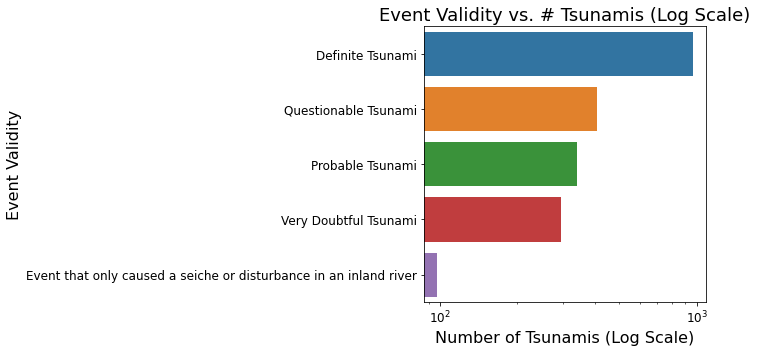

In [20]:
plt.figure(figsize=(10,5))
ax = sns.countplot(y="EVENT_VALIDITY", data=new_data, order=new_data["EVENT_VALIDITY"].value_counts().index)
ax.set_xscale("log")
ax.axes.set_title("Event Validity vs. # Tsunamis (Log Scale)",fontsize=18)
ax.set_xlabel("Number of Tsunamis (Log Scale)",fontsize=16)
ax.set_ylabel("Event Validity",fontsize=16)
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.show()

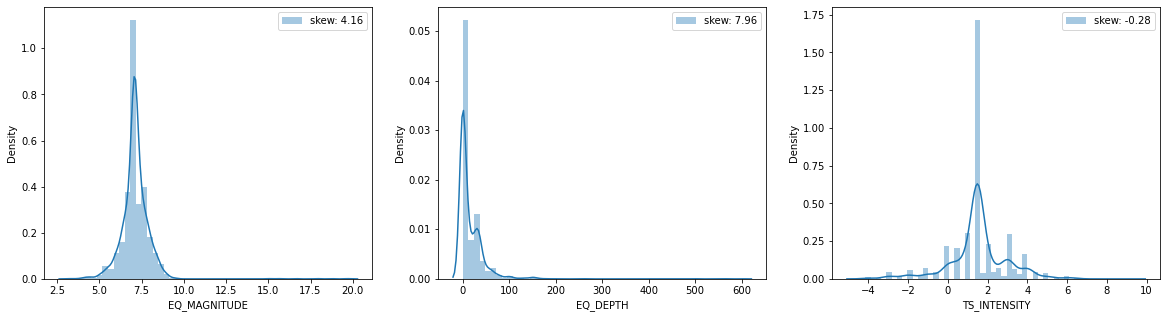

In [21]:
import warnings
warnings.filterwarnings('ignore')

#plotting the distribution and skewness of EQ_MAGNITUDE,EQ_DEPTH,TS_INTENSITY features

plt.figure(figsize=(20,5))
plt.subplot(131)
sns.distplot(new_data['EQ_MAGNITUDE'],label='skew: '+ str(np.round(new_data['EQ_MAGNITUDE'].skew(),2)))
plt.legend()
plt.subplot(132)
sns.distplot(new_data['EQ_DEPTH'],label='skew: '+ str(np.round(new_data['EQ_DEPTH'].skew(),2)))
plt.legend()
plt.subplot(133)
sns.distplot(new_data['TS_INTENSITY'],label='skew: '+ str(np.round(new_data['TS_INTENSITY'].skew(),2)))
plt.legend()
plt.show()

# Bivariate Analysis

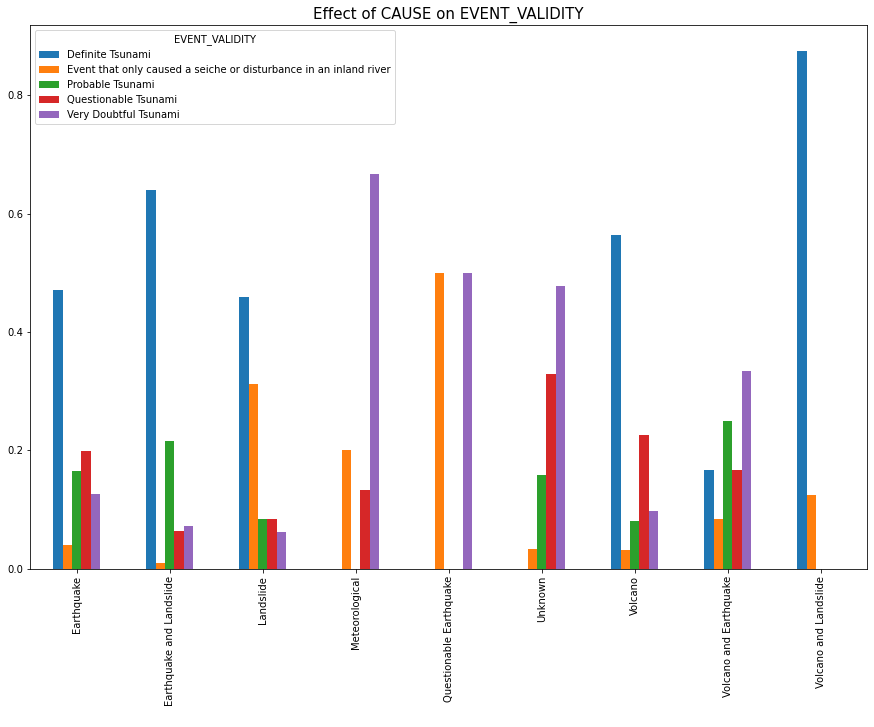

In [22]:
#plotting the effect of cause on event validity

plt.rcParams['figure.figsize'] = (15, 10)
x = pd.crosstab(new_data['CAUSE'], new_data['EVENT_VALIDITY'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = False)
plt.title('Effect of CAUSE on EVENT_VALIDITY', fontsize = 15)
plt.xlabel(' ')
plt.show()

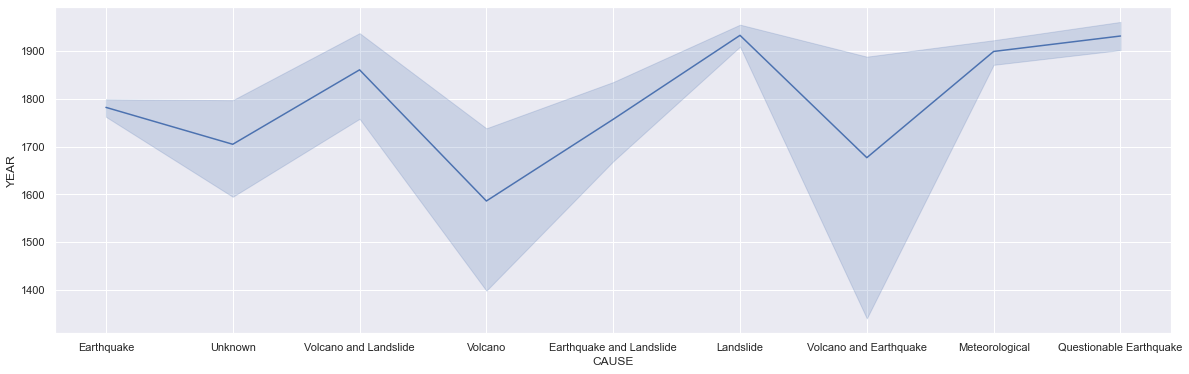

In [23]:
#plotting the line graph of the occurence of CAUSE over the years
sns.set(rc = {'figure.figsize' : (20,6)})
sns.lineplot(x= "CAUSE", y = "YEAR", data = new_data)
plt.show()

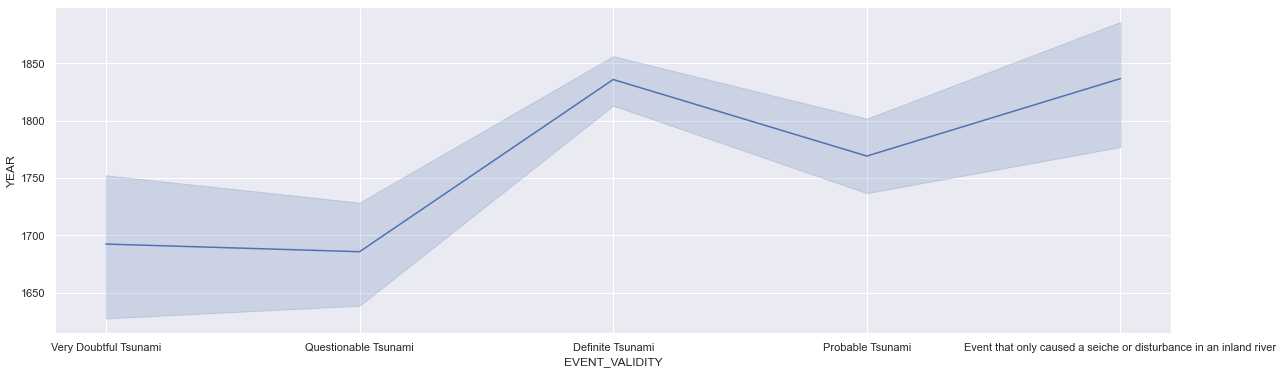

In [24]:
sns.set(rc = {'figure.figsize' : (20,6)})
sns.lineplot(x= "EVENT_VALIDITY", y = "YEAR", data = new_data)
plt.show()


From the above line graphs its clear that, Tsunamis due to earthquake and lanslide is more in the 20th century. The impact of Tsunami was high in the 20th century that too in the years 1920 to 1930. In the 19th century there were Tsunamis but the effect/impact was very less or doubtful and the cause was due to the volcanoes

#  Feature engineering

<AxesSubplot:>

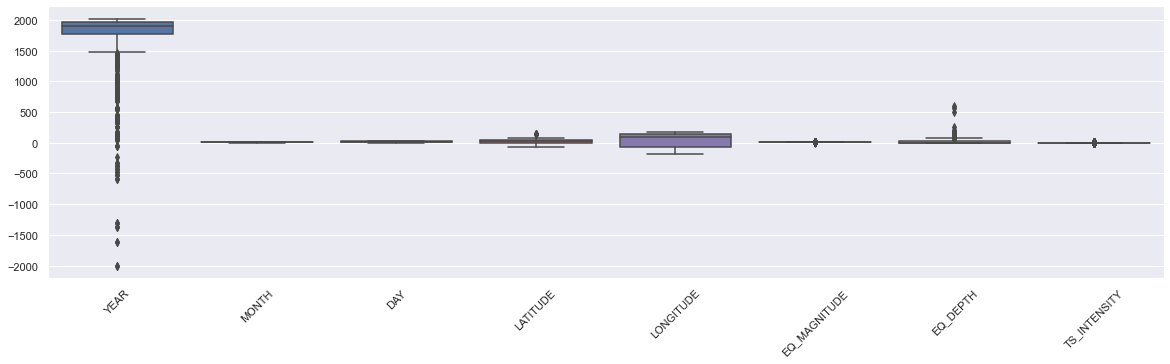

In [25]:
# checking whether there is any outliers present in the dataset for any feature
plt.figure(figsize=(20,5))
plt.xticks(rotation=45)
sns.boxplot(data=new_data)

We can see some negative values in the year column.,filtering that from 17th century ownwards.

In [26]:
new_data=new_data[new_data.YEAR>=1600]

In [27]:
new_data.shape

(1866, 13)

In [28]:
#COnverting YEAR,MONTH and DAY into int
for i in ['DAY','MONTH','YEAR']:
    new_data[i] =  new_data[i].astype(int) 


In [29]:
#concatenating day,month and year fields to a single field called DATE
new_data['DATE'] = new_data['DAY'].map(str) + '-' + new_data['MONTH'].map(str) + '-' + new_data['YEAR'].map(str)

In [30]:
#dropping YEAR,MONTH and DATE fields
new_data.drop(['DAY','MONTH','YEAR'],axis=1,inplace=True)

In [31]:
new_data.shape

(1866, 11)

In [32]:
#replacing the symbolic mistakes in the data features.
new_data['LONGITUDE'] = new_data['LONGITUDE'].replace({'−': '-'},regex=True)
new_data['LATITUDE'] = new_data['LATITUDE'].replace({'−': '-'},regex=True)
new_data['LATITUDE'] = new_data['LATITUDE'].replace({':': '.'},regex=True)

# Outliers detection and handling

<AxesSubplot:>

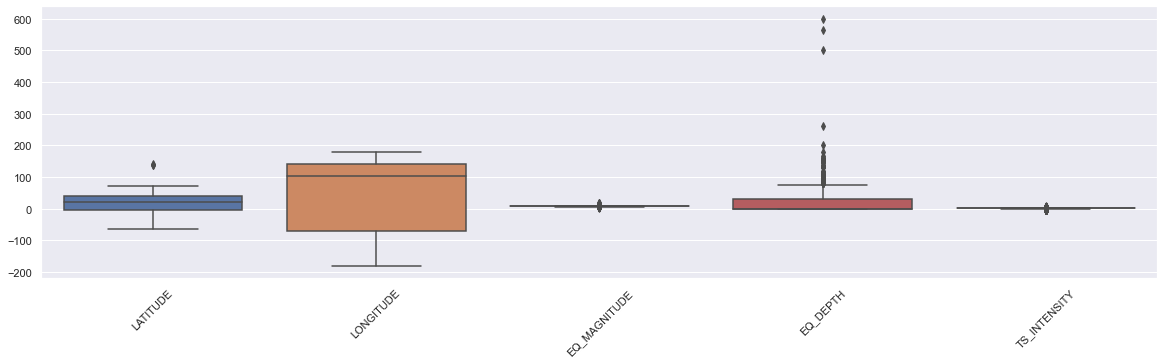

In [33]:
# checking whether there is any outliers present in the dataset for any feature
plt.figure(figsize=(20,5))
plt.xticks(rotation=45)
sns.boxplot(data=new_data)

In [34]:
#Handling outlier in LATITUDE field
Q1=np.percentile(new_data['LATITUDE'],25)
Q2=np.percentile(new_data['LATITUDE'],50)
Q3=np.percentile(new_data['LATITUDE'],75)

IQR = Q3-Q1

UL = Q3 + 1.5 * IQR
LL = Q1 - 1.5 * IQR

print('Lower limit is :',LL)
print('Upper limit is :',UL)

Lower limit is : -71.35
Upper limit is : 104.25


In [35]:
outlier = []
for i in new_data['LATITUDE']:
    if ((i>UL) | (i<LL)):
        outlier.append(i)

In [36]:
outlier

[138.117, 139.033, 142.467]

In [37]:
#all outliers are above Upper limit
ind = new_data[(new_data['LATITUDE'] > UL)]
new_data.drop(ind.index,inplace=True)

In [38]:
#Handling outliers in EQ_DEPTH field
Q1=np.percentile(new_data['EQ_DEPTH'],25)
Q2=np.percentile(new_data['EQ_DEPTH'],50)
Q3=np.percentile(new_data['EQ_DEPTH'],75)

IQR = Q3-Q1

UL = Q3 + 1.5 * IQR
LL = Q1 - 1.5 * IQR

print('Lower limit is :',LL)
print('Upper limit is :',UL)

Lower limit is : -45.0
Upper limit is : 75.0


In [39]:
outlier1 = []
for i in new_data['EQ_DEPTH']:
    if ((i>UL) | (i<LL)):
        outlier.append(i)

In [40]:
ind = new_data[(new_data['EQ_DEPTH'] < LL) | (new_data['EQ_DEPTH'] > UL)]
new_data.drop(ind.index,inplace=True)

<AxesSubplot:>

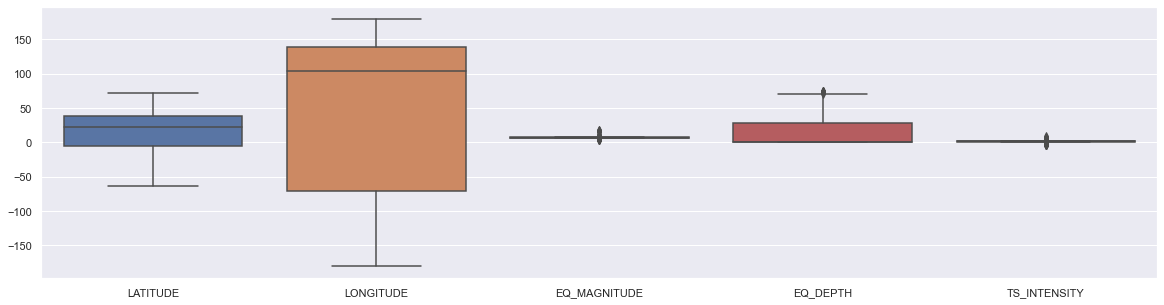

In [41]:
# Replotting the boxplot to check whether outliers are handled
plt.figure(figsize=(20,5))
sns.boxplot(data=new_data)

In [42]:
new_data.head()

,LATITUDE,LONGITUDE,LOCATION_NAME,COUNTRY,REGION,CAUSE,EVENT_VALIDITY,EQ_MAGNITUDE,EQ_DEPTH,TS_INTENSITY,DATE
5,33.100,139.800,"IZU PENINSULA, HACHIJO ISLAND",JAPAN,Japan,Unknown,Questionable Tsunami,7.1,0.0,0.5,1-3-1747
6,33.600,136.000,"TAIJI, KII",JAPAN,Japan,Unknown,Questionable Tsunami,7.1,0.0,1.0,1-8-1704
9,36.404,25.396,THERA ISLAND (SANTORINI),GREECE,Mediterranean Sea,Volcano and Landslide,Definite Tsunami,6.3,0.0,6.0,29-9-1650
11,38.733,-27.066,AZORES,PORTUGAL,Northeast Atlantic Ocean,Earthquake,Very Doubtful Tsunami,7.1,0.0,1.0,1-8-1676
15,35.100,129.050,E. CHINA SEA-S.JAPAN,EAST CHINA SEA,"China, North and South Korea, Philippines, Taiwan",Unknown,Very Doubtful Tsunami,7.1,0.0,0.0,31-7-1636


# Feature Reduction

In [43]:
new_data['DATE'].nunique()

1752

In [44]:
#Date fields are having unique values in almost all rows, so dropping the date field
new_data.drop('DATE',axis=1,inplace=True)

In [45]:
#Since latitude and longitude are given, location_name,country and region can be dropped
new_data.drop(['LOCATION_NAME','COUNTRY','REGION'],axis=1,inplace=True)

In [46]:
new_data.shape

(1800, 7)

In [47]:
#Resetting the index
new_data = new_data.reset_index(drop=True)

In [48]:
new_data.head()

,LATITUDE,LONGITUDE,CAUSE,EVENT_VALIDITY,EQ_MAGNITUDE,EQ_DEPTH,TS_INTENSITY
0,33.100,139.800,Unknown,Questionable Tsunami,7.1,0.0,0.5
1,33.600,136.000,Unknown,Questionable Tsunami,7.1,0.0,1.0
2,36.404,25.396,Volcano and Landslide,Definite Tsunami,6.3,0.0,6.0
3,38.733,-27.066,Earthquake,Very Doubtful Tsunami,7.1,0.0,1.0
4,35.100,129.050,Unknown,Very Doubtful Tsunami,7.1,0.0,0.0


# Encoding

In [49]:
new_data['EVENT_VALIDITY'].value_counts()

Definite Tsunami                                                     860
Questionable Tsunami                                                 328
Probable Tsunami                                                     281
Very Doubtful Tsunami                                                244
Event that only caused a seiche or disturbance in an inland river     87
Name: EVENT_VALIDITY, dtype: int64

In [50]:
#importing the label encoder
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
new_data['EVENT_VALIDITY'] = en.fit_transform(new_data['EVENT_VALIDITY'])

In [51]:
new_data['EVENT_VALIDITY'].value_counts()

0    860
3    328
2    281
4    244
1     87
Name: EVENT_VALIDITY, dtype: int64

In [52]:
#encoding the CAUSE field with 
new_data['CAUSE'].value_counts()

Earthquake                  1504
Earthquake and Landslide      89
Unknown                       71
Volcano                       54
Landslide                     48
Meteorological                15
Volcano and Earthquake        10
Volcano and Landslide          8
Questionable Earthquake        1
Name: CAUSE, dtype: int64

In [53]:
#since the cause 'unknown' is present and in less number, we can filter the dataset
new_data=new_data[new_data['CAUSE'] !='Unknown']

In [54]:
new_data.shape

(1729, 7)

In [55]:
#using label encoder for encoding the CAUSE field as the categories are more and one hot encoder takes more computational space
le = LabelEncoder()
new_data['CAUSE'] = en.fit_transform(new_data['CAUSE'])

In [56]:
new_data['CAUSE'].value_counts()

0    1504
1      89
5      54
2      48
3      15
6      10
7       8
4       1
Name: CAUSE, dtype: int64

In [57]:
new_data.shape

(1729, 7)

# Modelling

<AxesSubplot:>

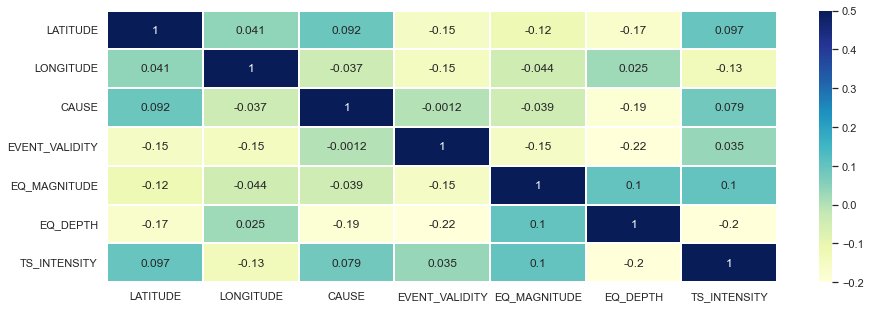

In [58]:
#finding the correlation between features
corrmatrix= new_data.corr()
plt.subplots(figsize=(15,5))
sns.heatmap(corrmatrix, vmin=-0.2, vmax=0.5, annot= True, linewidth= 0.2,cmap='YlGnBu')

In [59]:
new_data.columns

Index(['LATITUDE', 'LONGITUDE', 'CAUSE', 'EVENT_VALIDITY', 'EQ_MAGNITUDE',
       'EQ_DEPTH', 'TS_INTENSITY'],
      dtype='object')

In [60]:
#This is a classification model which use to predict the event_validity of the Tsunami

In [61]:
X=new_data.drop(['EVENT_VALIDITY'],axis=1)
y=new_data.drop(['LATITUDE', 'LONGITUDE', 'CAUSE','EQ_MAGNITUDE',
       'EQ_DEPTH', 'TS_INTENSITY'],axis=1)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)
model_train_acc=[]
model_test_acc=[]
model_test_recall_score=[]
model_test_f1_score=[]
model_test_precision_score=[]

#Random Classifier Model and fitting
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
model=rf.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_train_pred=model.predict(X_train)


from sklearn.metrics import f1_score,accuracy_score,recall_score,precision_score
model_train_acc.append(accuracy_score(y_train_pred,y_train))
model_test_acc.append(accuracy_score(y_test,y_pred))
model_test_recall_score.append(recall_score(y_test,y_pred,average='weighted'))
model_test_f1_score.append(f1_score(y_test,y_pred,average='weighted'))
model_test_precision_score.append(precision_score(y_test,y_pred,average='weighted'))

In [62]:
#Logistic Regression Model
from sklearn.linear_model import LogisticRegression
lgstc=LogisticRegression()
model=lgstc.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_train_pred=model.predict(X_train)

model_train_acc.append(accuracy_score(y_train_pred,y_train))
model_test_acc.append(accuracy_score(y_test,y_pred))
model_test_recall_score.append(recall_score(y_test,y_pred,average='weighted'))
model_test_f1_score.append(f1_score(y_test,y_pred,average='weighted'))
model_test_precision_score.append(precision_score(y_test,y_pred,average='weighted'))

In [63]:
#KNN model
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
model=knn.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_pred_train=model.predict(X_train)

model_train_acc.append(accuracy_score(y_train_pred,y_train))
model_test_acc.append(accuracy_score(y_test,y_pred))
model_test_recall_score.append(recall_score(y_test,y_pred,average='weighted'))
model_test_f1_score.append(f1_score(y_test,y_pred,average='weighted'))
model_test_precision_score.append(precision_score(y_test,y_pred,average='weighted'))

In [64]:
#SVM model
from sklearn.svm import SVC
sv=SVC()
model=sv.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy_score(y_test,y_pred)
y_pred_train=model.predict(X_train)

model_train_acc.append(accuracy_score(y_train_pred,y_train))
model_test_acc.append(accuracy_score(y_test,y_pred))
model_test_recall_score.append(recall_score(y_test,y_pred,average='weighted'))
model_test_f1_score.append(f1_score(y_test,y_pred,average='weighted'))
model_test_precision_score.append(precision_score(y_test,y_pred,average='weighted'))

In [65]:
#Decision Tree model
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
model=dc.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy_score(y_test,y_pred)
y_pred_train=model.predict(X_train)

model_train_acc.append(accuracy_score(y_train_pred,y_train))
model_test_acc.append(accuracy_score(y_test,y_pred))
model_test_recall_score.append(recall_score(y_test,y_pred,average='weighted'))
model_test_f1_score.append(f1_score(y_test,y_pred,average='weighted'))
model_test_precision_score.append(precision_score(y_test,y_pred,average='weighted'))

In [66]:
Models = ['Random Forest','Logistic regression','KNN','SVM','DecisionTree']
model_performance = pd.DataFrame({
    'Model':Models,
    'Train_acc':model_train_acc,
    'Test_acc':model_test_acc,
    'F1_score':model_test_f1_score,
    'Recall_score':model_test_recall_score,
    'Precision_score':model_test_precision_score
})
model_performance

,Model,Train_acc,Test_acc,F1_score,Recall_score,Precision_score
0,Random Forest,0.996385,0.546243,0.530298,0.546243,0.521280
1,Logistic regression,0.499638,0.526012,0.393513,0.526012,0.357083
2,KNN,0.499638,0.523121,0.506602,0.523121,0.506313
3,SVM,0.499638,0.523121,0.401309,0.523121,0.340692
4,DecisionTree,0.499638,0.528902,0.535270,0.528902,0.550328


RandomForestClassifier gives the good score in f1_score,accuracy,recall_score and precision

# Standardisation/Normalisation

In [67]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, normalize

In [68]:
from sklearn import preprocessing
ss=StandardScaler()
X=ss.fit_transform(X)
X=pd.DataFrame(X)
X.head()

,0,1,2,3,4,5
0,0.711895,-0.211853,5.743736,-0.903827,-0.783706,3.358011
1,0.797297,-0.710251,-0.310121,-0.008287,-0.783706,-0.287811
2,0.825422,-0.263116,-0.310121,-0.008287,-0.783706,0.441353
3,-0.849392,0.561774,-0.310121,-0.008287,-0.783706,-1.016976
4,-0.806343,0.515898,-0.310121,-0.120230,-0.783706,-0.652393


In [69]:
minmax=MinMaxScaler()
d=minmax.fit_transform(new_data)
names=new_data.columns
scaled_data=pd.DataFrame(d,columns=names)
scaled_data.head()

,LATITUDE,LONGITUDE,CAUSE,EVENT_VALIDITY,EQ_MAGNITUDE,EQ_DEPTH,TS_INTENSITY
0,0.737347,0.570535,1.0,0.00,0.200000,0.0,0.771689
1,0.754623,0.424789,0.0,1.00,0.251613,0.0,0.391172
2,0.760312,0.555544,0.0,0.75,0.251613,0.0,0.467275
3,0.421517,0.796766,0.0,1.00,0.251613,0.0,0.315068
4,0.430226,0.783351,0.0,0.50,0.245161,0.0,0.353120


In [70]:
#scaled=scaled_data.round(decimals=2)
#scaled.head()

In [71]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#Random Classifier Model and fitting after scaling using minmaxscaler

rf=RandomForestClassifier()
model=rf.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_train_pred=model.predict(X_train)

print('Test Accuracy:',accuracy_score(y_test,y_pred))
print('F1_score:',f1_score(y_test,y_pred,average='weighted'))
print('Recall_score:',recall_score(y_test,y_pred,average='weighted'))
print('Precision_score:',precision_score(y_test,y_pred,average='weighted'))


Test Accuracy: 0.5606936416184971
F1_score: 0.5424289077828335
Recall_score: 0.5606936416184971
Precision_score: 0.5296828219949606


In [72]:
#Random Classifier Model and fitting after scaling
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
model=rf.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_train_pred=model.predict(X_train)

print('Test Accuracy:',accuracy_score(y_test,y_pred))
print('F1_score:',f1_score(y_test,y_pred,average='weighted'))
print('Recall_score:',recall_score(y_test,y_pred,average='weighted'))
print('Precision_score:',precision_score(y_test,y_pred,average='weighted'))


Test Accuracy: 0.5635838150289018
F1_score: 0.5500591353113163
Recall_score: 0.5635838150289018
Precision_score: 0.5447328841234881


In [73]:
tree1 = DecisionTreeClassifier()
tree1.fit(X_train,y_train)
y_pred2 = tree1.predict(X_test)

print('Test Accuracy:',accuracy_score(y_test,y_pred2))
print('F1_score:',f1_score(y_test,y_pred2,average='weighted'))
print('Recall_score:',recall_score(y_test,y_pred2,average='weighted'))
print('Precision_score:',precision_score(y_test,y_pred2,average='weighted'))

Test Accuracy: 0.5144508670520231
F1_score: 0.520014307548864
Recall_score: 0.5144508670520231
Precision_score: 0.5334111871757867


In [74]:
lr1 = LogisticRegression(max_iter=200)
lr1.fit(X_train,y_train)
y_pred1 = lr1.predict(X_test)

print('Test Accuracy:',accuracy_score(y_test,y_pred1))
print('F1_score:',f1_score(y_test,y_pred1,average='weighted'))
print('Recall_score:',recall_score(y_test,y_pred1,average='weighted'))
print('Precision_score:',precision_score(y_test,y_pred1,average='weighted'))

Test Accuracy: 0.546242774566474
F1_score: 0.4314738484104217
Recall_score: 0.546242774566474
Precision_score: 0.37423104743981206


Even after scaling, there is only slight increase in the scores using Randomforest.

# Hyper Parameter Tuning

Taking the Random Forest model:

In [80]:
rfc1 = RandomForestClassifier(criterion='gini',n_estimators=100,min_samples_split=100,
                              min_samples_leaf=1,max_features='auto',oob_score=True,
                             random_state=1,n_jobs=-1)
rfc1.fit(X_train, y_train)
y_pred0= rfc1.predict(X_test)
print('Accuracy Score is:', accuracy_score(y_test, y_pred0))
print('Recall Score is:', recall_score(y_test, y_pred0,average='weighted'))
print('Precision Score:', precision_score(y_test, y_pred0,average='weighted'))
print('F1 score is:', f1_score(y_test, y_pred0,average='weighted'))

Accuracy Score is: 0.6040462427745664
Recall Score is: 0.6040462427745664
Precision Score: 0.6015074253724064
F1 score is: 0.5315997532413568


With parameter tuning, the accuracy has got improved in randomforest calssifier.Hence this can be taken as the best model among others